## Observations and Insights

In [111]:
%matplotlib inline

## Dependencies and starter code

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata = "../data/Mouse_metadata.csv"
study_results = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df= pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_df = merged_df.dropna()
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_df_sem = merged_df.groupby(["Drug Regimen"]).sem()
grouped_df_var = merged_df.groupby(["Drug Regimen"]).var()
grouped_df_mean = merged_df.groupby(["Drug Regimen"]).mean()
grouped_df_std = merged_df.groupby(["Drug Regimen"]).std()

# grouped_df_ss = grouped_df_ss.loc[:,['Tumor Volume (mm3)']]
grouped_df_sem = grouped_df_sem.loc[:,['Tumor Volume (mm3)']]
grouped_df_var = grouped_df_var.loc[:,['Tumor Volume (mm3)']]
grouped_df_mean = grouped_df_mean.loc[:,['Tumor Volume (mm3)']]
grouped_df_std = grouped_df_std.loc[:,['Tumor Volume (mm3)']]

merged_varandsam= pd.merge(grouped_df_sem, grouped_df_var, on="Drug Regimen")
merged_varandsam = merged_varandsam.rename(columns={ "Tumor Volume (mm3)_x": "SEM", "Tumor Volume (mm3)_y" : "Variance"})
merged_meanandstd= pd.merge(grouped_df_mean, grouped_df_std, on="Drug Regimen")
merged_meanandstd = merged_meanandstd.rename(columns={ "Tumor Volume (mm3)_x": "Mean", "Tumor Volume (mm3)_y" : "Standard Deviation"})

merged_ss= pd.merge(merged_varandsam, merged_meanandstd, on="Drug Regimen")

merged_ss.style.format({"SEM": "{:20,.2f}", "Variance": "{:20,.0f}","Mean": "{:20,.2f}","Standard Deviation": "{:20,.2f}"})

,SEM,Variance,Mean,Standard Deviation
Drug Regimen,,,,
Capomulin,0.33,25,40.68,4.99
Ceftamin,0.47,39,52.59,6.27
Infubinol,0.49,43,52.88,6.57
Ketapril,0.60,69,55.24,8.28
Naftisol,0.60,66,54.33,8.13
Placebo,0.58,61,54.03,7.82
Propriva,0.51,42,52.32,6.51
Ramicane,0.32,23,40.22,4.85
Stelasyn,0.57,59,54.23,7.71


## Bar plots

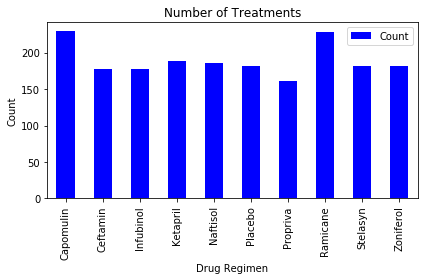

In [113]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
merged_df_p = merged_df.groupby(['Drug Regimen']).size().to_frame('Count')
merged_df_p.plot.bar(color= 'blue')
plt.title('Number of Treatments')
plt.ylabel('Count')
plt.tight_layout()

In [ ]:
merged_df

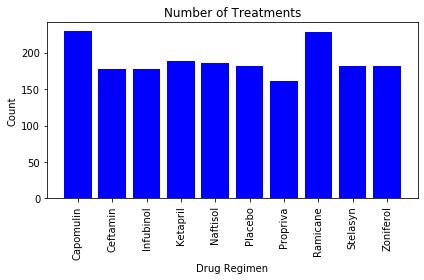

In [114]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot\
x_axis = np.arange(len(merged_df))
tick_locations = [value for value in x_axis]


plt.bar(merged_df_p.index.values,merged_df_p["Count"], color='blue')
plt.xticks( rotation="vertical")

plt.title("Number of Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.tight_layout()

plt.show()

## Pie plots

Text(0.5, 1.0, 'Distribution of Male to Female')

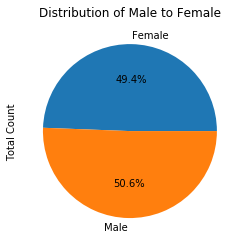

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = merged_df['Sex'].value_counts(ascending=True)
gender_df=gender_df.to_frame('Total Count')
gender_df.index.name = 'Gender'
gender_df
gender_df.plot(x ='Gender', y='Total Count', kind = 'pie', autopct="%1.1f%%", legend=False)
plt.title("Distribution of Male to Female")

Text(0.5, 1.0, 'Distribution of Male to Female')

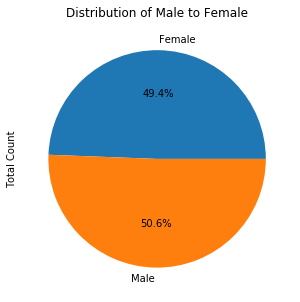

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plot = gender_df.plot.pie(y='Total Count', figsize=(5, 5), autopct="%1.1f%%", legend=False)
plt.title("Distribution of Male to Female")

## Quartiles, outliers and boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

final_tumor = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin") | (
    merged_df["Drug Regimen"] == "Ramicane") | (
    merged_df["Drug Regimen"] == "Infubinol")| (
    merged_df["Drug Regimen"] == "Ceftamin"), :]

final_tumor_sum = final_tumor.groupby(["Mouse ID"])["Tumor Volume (mm3)"].sum()

final_tumor_sum = final_tumor_sum.to_frame('Tumor Size')


# Q1 = final_tumor_sum.quantile(0.25)
# Q3 = final_tumor_sum.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

# print(final_tumor_sum < (Q1 - 1.5 * IQR)) |(final_tumor_sum > (Q3 + 1.5 * IQR))

#Determined and removed outliers
final_tumor_sum_ro = final_tumor_sum[~((final_tumor_sum < (Q1 - 1.5 * IQR)) |(final_tumor_sum > (Q3 + 1.5 * IQR))).any(axis=1)]
final_tumor_sum_ro.shape
final_tumor_sum_ro

,Tumor Size
Mouse ID,
a203,563.127077
a251,552.370946
a275,527.709651
a411,407.013854
a444,430.600524
...,...
y769,562.908873
y793,385.068292
y865,549.985586


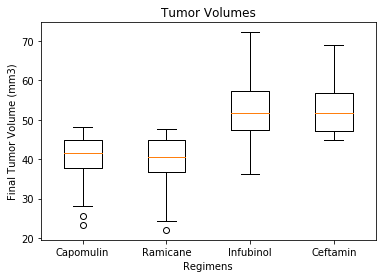

In [123]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

capomulin = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel("Regimens")
plt.title("Tumor Volumes")
plt.show()

## Line and scatter plots

Text(0.5, 0, 'Timepoint (Days)')

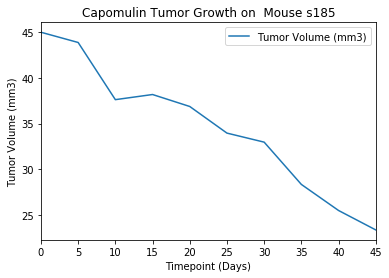

In [90]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomuline_line = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin")]
capomuline_line = capomuline_line.loc[(capomuline_line["Mouse ID"] == "s185")]
capomuline_line.plot.line(x='Timepoint', y='Tumor Volume (mm3)', title = "Capomulin Tumor Growth on  Mouse s185")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (Days)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

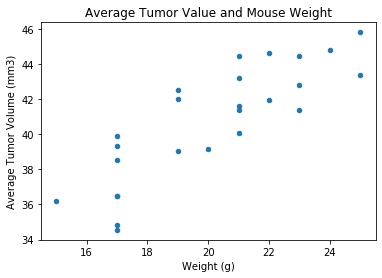

In [102]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_df = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin")]
weight_df = weight_df.groupby(["Mouse ID"]).mean()
weight_df

weight_df.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', title = "Average Tumor Value and Mouse Weight")
plt.ylabel('Average Tumor Volume (mm3)')


The r-squared is: 0.8419363424694718


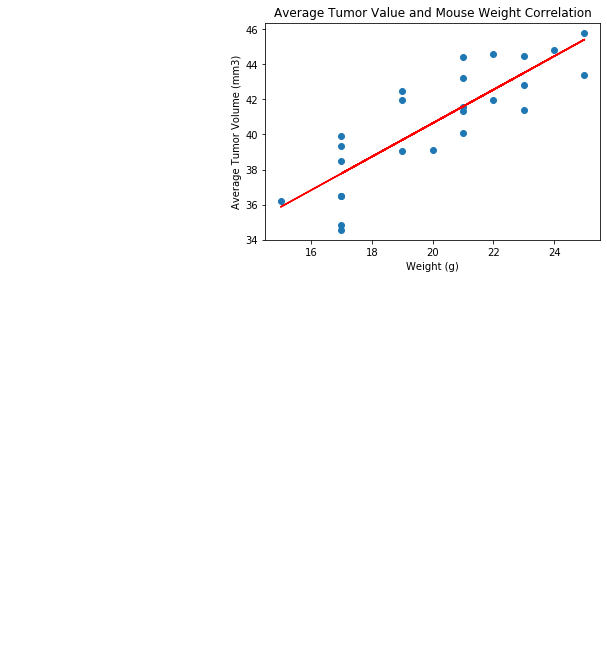

In [110]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = weight_df["Weight (g)"]
y_values = weight_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Average Tumor Value and Mouse Weight Correlation")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()